### This code simulates & plots the price of a stock using Geometric Brownian Motion, which consists of a drift + diffusion term that are proportional to prices. It builds upon Financial Engineering principles that I am currently taught in school.

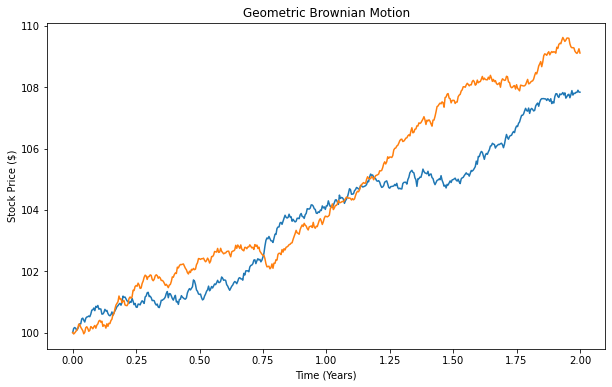

In [173]:
import math
import numpy as np
import matplotlib.pyplot as plt

def generate_gbm(s0, mu, sigma, dt, T, num_paths):
    # Calculate the number of time steps and generate the time grid
    num_steps = int(T/dt)
    t = np.linspace(0, T, num_steps+1)

    # Generate random noise
    dW = np.random.normal(0, np.sqrt(dt), size=(num_steps, num_paths))

    # Calculate the drift and diffusion terms
    drift = (mu - 0.5*sigma**2)*dt
    diffusion = sigma*np.sqrt(dt)

    # Initialize the stock price matrix
    S = np.zeros((num_steps+1, num_paths))
    S[0,:] = s0

    # Generate the stock price paths
    for i in range(num_steps):
        S[i+1,:] = S[i,:] * np.exp(drift + diffusion*dW[i,:])        

    return t, S

# Set the initial parameters
s0 = 100
mu = 0.05
sigma = 0.2
dt = 1/252 # 252 trading days, so simulate the change after each day
T = 2 # in years
num_paths = 2

# Generate the GBM paths
t, S = generate_gbm(s0, mu, sigma, dt, T, num_paths)

# Plot the results
plt.figure(figsize=(10,6))
for i in range(num_paths):
    plt.plot(t, S[:,i])
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.title('Geometric Brownian Motion')
plt.show()

### Building upon an exercise I found in David Luenberger's FE book - ('Investment Science' - Ex. 10 - Chapter 11) -> You want to simulate the number of years it takes for 1/t*ln(S(t)) to converge. Since S(t) is lognormal, you can find that the previous expression is Normal:

$$
  \frac{ln(S(t))}{t} \sim N(\nu, \sigma^2/t)
$$


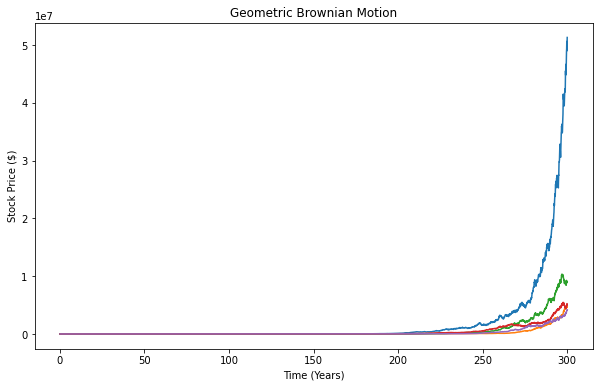

In [174]:
import math
import numpy as np
import matplotlib.pyplot as plt

def generate_gbm(s0, mu, sigma, dt, T, num_paths):
    # Calculate the number of time steps and generate the time grid
    num_steps = int(T/dt)
    t = np.linspace(0, T, num_steps+1)

    # Generate random noise
    dW = np.random.normal(0, np.sqrt(dt), size=(num_steps, num_paths))

    # Calculate the drift and diffusion terms
    drift = (mu - 0.5*sigma**2)*dt
    diffusion = sigma*np.sqrt(dt)

    # Initialize the stock price matrix
    S = np.zeros((num_steps+1, num_paths))
    S[0,:] = s0

    # Generate the stock price paths
    for i in range(num_steps):
        S[i+1,:] = S[i,:] * np.exp(drift + diffusion*dW[i,:])

    return t, S

# Set the initial parameters
s0 = 1
mu = 0.1
sigma = 0.3
dt = 1/12
T = 300
num_paths = 5

# Generate the GBM paths
t, S = generate_gbm(s0, mu, sigma, dt, T, num_paths)

# Plot the results
plt.figure(figsize=(10,6))
for i in range(num_paths):
    plt.plot(t, S[:,i])
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.title('Geometric Brownian Motion')
plt.show()

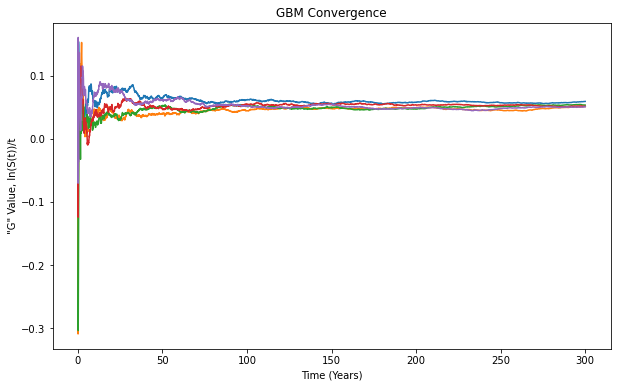

In [177]:
import math
import numpy as np
import matplotlib.pyplot as plt

def Convergence_test(s0, dt, T, num_paths):
    # Calculate the number of time steps and generate the time grid
    num_steps = int(T/dt)
    t = np.linspace(0, T, num_steps+1)
    # Begin 1/t conversion
    T = t
    T[0] = 1e-2
    tinv = np.power(T, -1)

    # Generate random noise
    dW = np.random.normal(0, np.sqrt(dt), size=(num_steps, num_paths))

    # Calculate the drift and diffusion terms
    drift = (mu - 0.5*sigma**2)*dt
    diffusion = sigma*np.sqrt(dt)

    # Initialize the stock price matrix
    lnS = np.zeros((num_steps+1, num_paths))
    lnS[0,:] = math.log(s0)
    F = np.zeros((num_steps+1, num_paths))
    #G[0,:] = lnS[0]/tinv[0]

    # Generate the stock price paths
    for i in range(num_steps):
        for j in range(num_paths):
            lnS[i+1,j] = math.log(S[i+1,j])
            F[i+1,j] = lnS[i+1,j]*tinv[i+1]
            

    return tinv, lnS, F

# Generate the GBM paths
tinv, lnS, F = Convergence_test(s0, dt, T, num_paths)

# Plot the results
plt.figure(figsize=(10,6))
for i in range(num_paths):
    plt.plot(t, F[:,i])
plt.xlabel('Time (Years)')
plt.ylabel('"G" Value, ln(S(t))/t')
plt.title('GBM Convergence')
plt.show()